## Context of Data

Company-wide Employees E-Commerce purchase data

Customers - Most purchased ones are belongs to Dietitian, Lawyers professionals

Transactions purchase range on average of $50

Transaction purchase period all through 24hours

Results obtained from Exploratory Data Analysis (EDA)

<font color=blue>

1. The customer with the highest number of purchase comes from the Dietitian Professionals

2. 'Brown Ltd' company's employees have purchased most values as $796.38

3. The TOP 5 companies employees placed the highest number of purchases as below:

        Brown Ltd
        Williams LLC
        Smith LLC
        Smith PLC
        Johnson Ltd

4. The TOP purchased customer brownsarah@gmail.com with the value as $198.83

5. The Top 5 customer's purchases are
        brownsarah@gmail.com    ==> $198.83
        wjohnson@yahoo.com      ==> $175.61
        cgray@gmail.com         ==> $154.41
        lawrenceemily@yahoo.com ==> $154.31
        wilsonjohn@yahoo.com    ==> $153.36

6. The highest number of purchase are done in the evening(PM)

7. The highest number of purchase are done by [ru] language customers

8. Majority of the customers(around 79.2%) customers are using Mozilla for browsing and to purchase items
</font>

In [1]:
import pandas as pd
import re
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()

import gc

%matplotlib inline
color = sns.color_palette()

In [2]:
ecom = pd.read_csv('Ecommerce_Purchases.csv')

In [3]:

selected_columns = ecom[['AM or PM', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price']]

cleaned_ecom = selected_columns.copy()

In [4]:
#clean up address
address = ecom['Address'].str.extract(r",*\W*([A-Z]{2}\W+[0-9\-]*)$", expand = False)
address = address.str.split(pat=r"\W|\-", expand = True)

In [5]:
#clean browser
browser = ecom['Browser Info'].str.split(pat=r" |\(|\)", expand = True)
browser_and_ver = browser[0].str.split(pat=r"/", expand = True)

In [6]:
cleaned_ecom['Browser'] = browser_and_ver[0]
cleaned_ecom['Browser Version'] = browser_and_ver[1]

cleaned_ecom['State'] =   address[0]
cleaned_ecom['ZIP Code'] =   address[1]
cleaned_ecom['ZIP Code'] = cleaned_ecom['ZIP Code'].astype(int)

In [7]:
# Write contents of the DataFrame to a CSV file

#newcsvFileName = 'New_Ecommerce_Purchases.csv'

#new_ecom.to_csv(newcsvFileName,index=False);

In [8]:
cleaned_ecom

,AM or PM,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,Browser,Browser Version,State,ZIP Code
0,PM,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,Opera,9.56.,NE,77130
1,PM,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,Opera,8.93.,TN,84355
2,PM,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,Mozilla,5.0,AP,27450
3,PM,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04,Mozilla,5.0,WA,45798
4,AM,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,Opera,9.58.,TX,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PM,Randall-Sloan,342945015358701,03/22,838,JCB 15 digit,iscott@wade-garner.com,Printmaker,29.73.197.114,it,82.21,Mozilla,5.0,CO,96415
9996,AM,"Hale, Collins and Wilson",210033169205009,07/25,207,JCB 16 digit,mary85@hotmail.com,Energy engineer,121.133.168.51,pt,25.63,Mozilla,5.0,TX,55158
9997,AM,Anderson Ltd,6011539787356311,05/21,1,VISA 16 digit,tyler16@gmail.com,Veterinary surgeon,156.210.0.254,el,83.98,Mozilla,5.0,AE,28026
9998,PM,Cook Inc,180003348082930,11/17,987,American Express,elizabethmoore@reid.net,Local government officer,55.78.26.143,es,38.84,Mozilla,5.0,IA,12457


In [9]:
cleaned_ecom.describe()

,Credit Card,CC Security Code,Purchase Price,ZIP Code
count,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,2.341374e+15,907.217800,50.347302,49808.190700
std,2.256103e+15,1589.693035,29.015836,28965.375251
min,6.040186e+10,0.000000,0.000000,29.000000
25%,3.056322e+13,280.000000,25.150000,24745.000000
50%,8.699942e+14,548.000000,50.505000,49695.000000
75%,4.492298e+15,816.000000,75.770000,75011.250000
max,6.012000e+15,9993.000000,99.990000,99994.000000


In [10]:

class DataFrameWithImputor():
    def __init__(self,df):
        self.df=df
        
    def get_data_frame(self):
        return self.df
    
       
    #Randomly find indexes for x% of the column to populate with NaN values
    def introduce_errors(self, attribute, percent):
        column = self.df[attribute]
        error_data = int(column.size * percent)
        i = [random.choice(range(column.shape[0])) for _ in range(error_data)]
        column[i] = np.NaN
        self.df[attribute] = column
        return len(set(i)) # lengh of error indexes
    
    #Randomly find indexes for x% of the cells to populate with NaN values
    def introduce_errors_in_dataframe(self, percent):
        rows = len(self.df.index)
        error_data = int(rows * percent)
        columns = len(self.df.columns)
        for i in range(error_data):
            col = i  % columns
            row = i % rows
            self.df.iloc[row,col] = np.NaN
        return self.df.isnull().sum().sum()



    def impute(self,column,value):
        #Impute NaN values in the column with a random value

        null_values = self.df[self.df[column].isnull()].index

        for i in range(len(null_values)):
            self.df[column][null_values]  = value

        col_description = pd.DataFrame(self.df[column].describe())
        col_description.loc['Frequent'] = self.df[column].value_counts().idxmax()
        return col_description

    def get_nan_count(self):
        return self.df.isnull().sum()
    
    
    def find_empty_string(self):
        return np.where(self.df.applymap(lambda x: x == '')) # return rows with empty string
    
    def nan_values_in_column(self):
        return np.where(pd.isnull(self.df)) #return indexes for null values in a row
    
    def describe(self):
        return self.df.describe
    
    def describe_col(self, col):
        desc = pd.DataFrame(self.df[col].describe())
        
        desc.loc['Frequent'] = self.df[col].value_counts().idxmax()
        return desc
    
    def fillforward(self):
        self.df = self.df.fillna(method='ffill',axis = 0)
        
     
    def fillbackward(self):
        self.df = self.df.fillna(method='bfill',axis = 0)
        
        
   
        

In [11]:
unimputed = DataFrameWithImputor(cleaned_ecom) 
if len(unimputed.find_empty_string()) > 2:
    print('Empty strings in the data frame')
    
if len(unimputed.nan_values_in_column()) > 2:
    print('NaN in the data frame')
    

In [12]:
 def do_imputation(df,column,error_rate,condition = None  ):
        
        imp = DataFrameWithImputor(df.copy()) 

        imp.introduce_errors(column,error_rate)
        
        if condition != None:
            imp.impute(column,condition)
        else:
            #Impute through backfill and forwardfill
            imp.fillbackward()
            imp.fillforward()
        
        return imp
    
    

In [13]:
#####
#  Mean imputation
#####

mean_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1, cleaned_ecom['Purchase Price'].mean())


#####
#  Median imputation
#####
#Impute NaN values in the column with the median


median_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1, cleaned_ecom['Purchase Price'].median())

#####
#  Random imputation
#####

random_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1,random.choice(range(1,99))) 

#####
#  Impute with constant
#####

const_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1, 50)

#Forward and backward fill to impute data
#
#
fill_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1) 



In [14]:
fill_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.509079
std,29.063262
min,0.000000
25%,25.260000
50%,50.710000
75%,75.970000
max,99.990000
Frequent,50.270000


In [15]:
const_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.426792
std,27.673686
min,0.000000
25%,27.907500
50%,50.000000
75%,73.170000
max,99.990000
Frequent,50.000000


In [16]:
median_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.335762
std,27.656901
min,0.000000
25%,27.680000
50%,50.505000
75%,72.982500
max,99.990000
Frequent,50.505000


In [17]:
random_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,51.182805
std,27.676828
min,0.000000
25%,28.010000
50%,55.735000
75%,72.812500
max,99.990000
Frequent,59.000000


In [18]:
mean_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.323917
std,27.660129
min,0.010000
25%,27.707500
50%,50.347302
75%,72.980000
max,99.990000
Frequent,50.347302


In [19]:
unimputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.347302
std,29.015836
min,0.000000
25%,25.150000
50%,50.505000
75%,75.770000
max,99.990000
Frequent,49.730000


In [20]:
df = mean_imputed.get_data_frame()

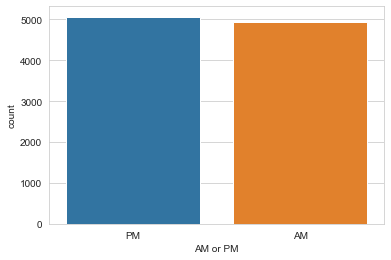

In [21]:
sns.countplot(df['AM or PM'],label='Count')
plt.show()

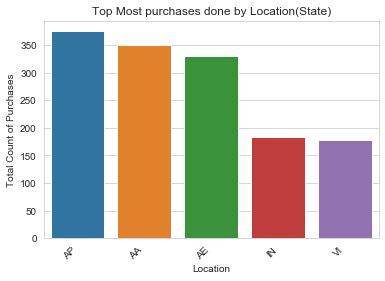

In [22]:
res=df.groupby(by='State', as_index=False).count()[['State','Purchase Price']]
res = res.sort_values(by='Purchase Price', ascending=False).head()
plt.title('Top Most purchases done by Location(State)')
ax = sns.barplot(x = "State", y = "Purchase Price", data = res)
ax.set(xlabel="Location", ylabel = "Total Count of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Top 5 most purchase done by professionals

In [23]:
job = df.groupby(by=['Job'], as_index=False)['Purchase Price'].sum()
res1= job.sort_values(by='Purchase Price', ascending=False).head()
res1

,Job,Purchase Price
473,Purchasing manager,1620.761906
325,Lawyer,1538.234604
158,Dietitian,1528.136510
589,"Therapist, art",1524.333812
101,Clinical cytogeneticist,1495.920000


[Text(0, 0, 'Purchasing manager'),
 Text(0, 0, 'Lawyer'),
 Text(0, 0, 'Dietitian'),
 Text(0, 0, 'Therapist, art'),
 Text(0, 0, 'Clinical cytogeneticist')]

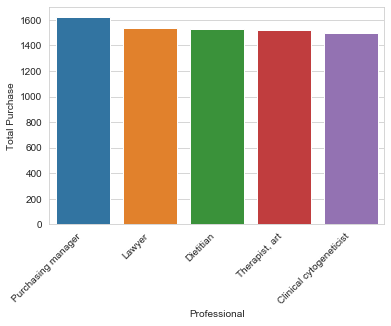

In [24]:
ax = sns.barplot(x = "Job", y = "Purchase Price", data = res1)
ax.set(xlabel="Professional", ylabel = "Total Purchase")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [25]:
print('The TOP 5 customers with max amount of purchase...')
res = df.groupby(by=['Email'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
res

The TOP 5 customers with max amount of purchase...


,Email,Purchase Price
1084,brownsarah@gmail.com,198.83
9549,wjohnson@yahoo.com,175.61
1342,cgray@gmail.com,154.41
5255,lawrenceemily@yahoo.com,154.31
9531,wilsonjohn@yahoo.com,153.36


[Text(0, 0, 'brownsarah@gmail.com'),
 Text(0, 0, 'wjohnson@yahoo.com'),
 Text(0, 0, 'cgray@gmail.com'),
 Text(0, 0, 'lawrenceemily@yahoo.com'),
 Text(0, 0, 'wilsonjohn@yahoo.com')]

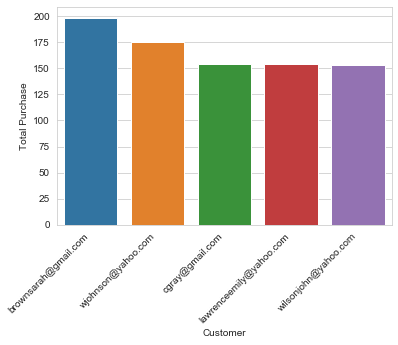

In [26]:
ax = sns.barplot(x = "Email", y = "Purchase Price", data = res)
ax.set(xlabel="Customer", ylabel = "Total Purchase")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [27]:
print('The TOP 5 customers with max amount of purchase and their companies')
res = df.groupby(by=['Email'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
pd.merge(df, res, how='inner', on = 'Email')[['Email', 'Company']]



The TOP 5 customers with max amount of purchase and their companies


,Email,Company
0,wjohnson@yahoo.com,Morrison LLC
1,wjohnson@yahoo.com,Weiss-Smith
2,wilsonjohn@yahoo.com,Williams Inc
3,wilsonjohn@yahoo.com,Davis and Sons
4,cgray@gmail.com,Anderson-Adams
5,cgray@gmail.com,Mills-Mccarty
6,brownsarah@gmail.com,"Nichols, Parrish and Jackson"
7,brownsarah@gmail.com,"Davis, Smith and Horn"
8,lawrenceemily@yahoo.com,"Evans, Sims and Barnes"
9,lawrenceemily@yahoo.com,Johnson Group


Discover patterns for Purchase Price¶

In [28]:
df['Purchase Price'].describe()

count    10000.000000
mean        50.323917
std         27.660129
min          0.010000
25%         27.707500
50%         50.347302
75%         72.980000
max         99.990000
Name: Purchase Price, dtype: float64

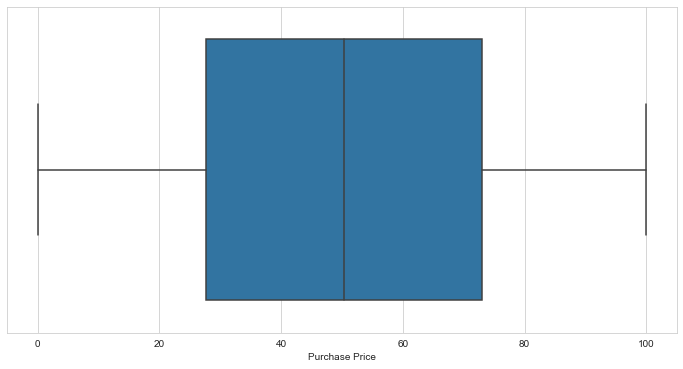

In [29]:
# check the distribution of Purchase price
plt.subplots(figsize=(12,6))
sns.boxplot(df['Purchase Price'])
plt.show()

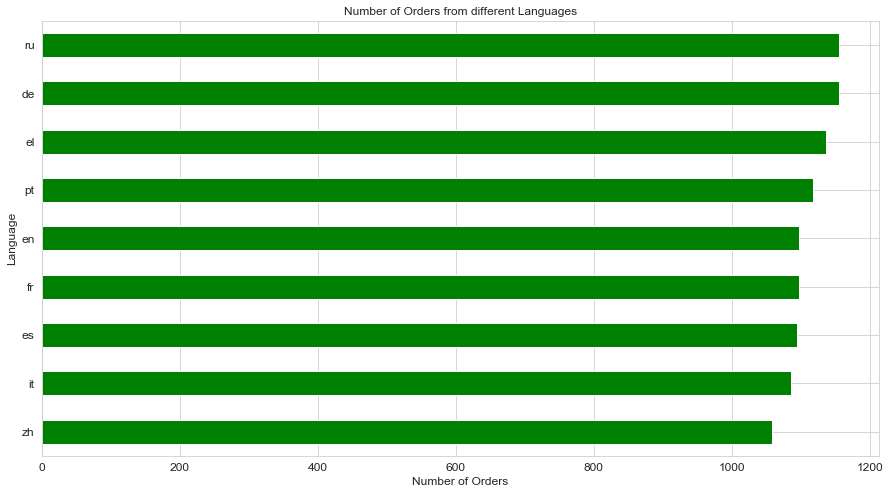

In [30]:
group_language_orders = df.groupby('Language')['Purchase Price'].count().sort_values()

# plot number of unique customers in each Language
plt.subplots(figsize=(15,8))
group_language_orders.plot(kind='barh', fontsize=12, color='green')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Language', fontsize=12)
plt.title('Number of Orders from different Languages', fontsize=12)
plt.show()

Browser Usage Analysis for purchase¶

In [31]:
browser_data = df.groupby(by='Browser', as_index=False)['Purchase Price'].count()
browser_data

,Browser,Purchase Price
0,Mozilla,7924
1,Opera,2076


In [32]:
from matplotlib.pyplot import pie, axis, show
browser_data['Browser']=browser_data['Browser'].map({'Mozilla':0,'Opera':1})

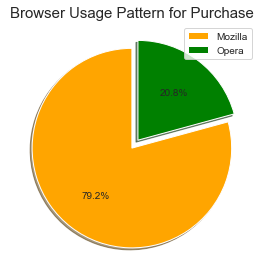

In [33]:
labels = ['Mozilla','Opera']
colors = ['orange', 'green'] 
explode =(0,0.1) 
fig, ax1 = plt.subplots(figsize = (9,4)) 
ax1.pie(browser_data['Purchase Price'], explode = explode, colors=colors, startangle=90, autopct='%.1f%%', shadow = True) 
plt.title('Browser Usage Pattern for Purchase', fontsize = 15) 
ax1.legend(labels, loc = 'upper right') 
plt.tight_layout() 
plt.show()

In [34]:
print('The TOP 5 Companies with max amount of purchase...')
res = df.groupby(by=['Company'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
res

The TOP 5 Companies with max amount of purchase...


,Company,Purchase Price
805,Brown Ltd,796.380000
8303,Williams LLC,723.630000
7166,Smith LLC,637.920000
7164,Smith Group,605.137302
7168,Smith PLC,603.501906


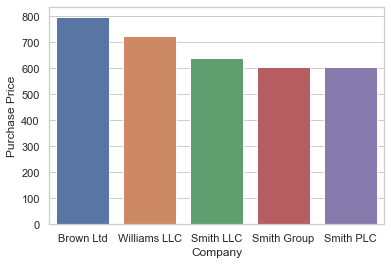

In [35]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Company", y="Purchase Price", data=res)

In [36]:
res.iplot(kind='bar', x="Company", y="Purchase Price", color='green')